# Numerical simulation of ODE
Here we simulate integrate an ODE numerically to study the dynamics. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as sp
import time

#time steppers
def Stepper_Euler_ODE(x,func,dt):
    """Explicit Euler"""
    return x + dt*func(x)
    
def Stepper_RK4_ODE(x,func,dt):
    """Classic Runge–Kutta 4th order."""
    k1 = func(x)             # f(t, x)
    k2 = func(x + 0.5*dt*k1) #f(t + 0.5*dt, x + 0.5*dt*k1)
    k3 = func(x + 0.5*dt*k2) #f(t + 0.5*dt, x + 0.5*dt*k2)
    k4 = func(x + dt*k3)     #f(t + dt,     x + dt*k3)
    return x + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)

In [2]:
# Simulation
# Parameters
a_val   =  1   
eps_val = 0.2  
x0     = -0.1  #inital conditions
params = {'a': a_val, 'eps': eps_val}

#simulation parameters
dt = 0.001       # time step
T = 10          # total time
N = int(T/dt)   # number of steps

#Defeniton of the evolution function
f = lambda x: -4*(a_val**2)*x*(x**2 - 1) - eps_val;


# Arrays to store results
t_vals = np.linspace(0, T, N)
x_vals = np.zeros(N)
x_vals[0] = x0

print(f'Simulation started, parameters = {params}')
wall_time_start = time.time()

#forward integration of dx/dt = f(x)
for i in range(N-1):
    x_vals[i+1] = Stepper_Euler_ODE(x_vals[i],f,dt) #Euler time-stepper
    #x_vals[i+1] = Stepper_RK4_ODE(x_vals[i],f,dt) #RK4 time-stepper 

wall_time = time.time() - wall_time_start
print(f'Simulation done. Wall_Time = {wall_time:.2f}[sec]')  


Simulation started, parameters = {'a': 1, 'eps': 0.2}
Simulation done. Wall_Time = 0.01[sec]


Text(0, 0.5, '$t$')

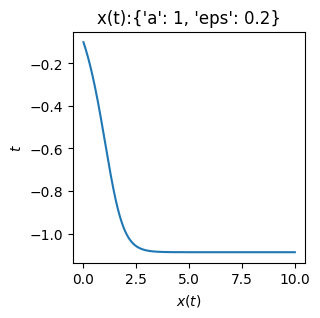

In [3]:
#Plot results
plt.figure(figsize=(3,3), dpi = 100)
plt.plot(t_vals,x_vals)
plt.title(f'x(t):{params}')
plt.ylabel('$x(t)$')
plt.xlabel('$t$')